# Full analysis with nested CV

In [1]:
import pickle
import numpy as np
import pandas as pd

In [2]:
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr
import math

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import nibabel as nib

In [5]:
from nilearn import plotting


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [6]:
data_path = '/gpfs/projects/sanlab/bsmith16/data/'

## Setup

In [7]:
metadata = pickle.load(open(data_path + "first_subs_nifti_metadata.pkl",'rb'))

In [8]:
from measure_results import *

In [9]:
def within_group_performance(results,cor_func,
                             group_col_name='result_group',
                             obs_col_name='y',
                             pred_col_name='y_pred'
                             
                            ):
    results[obs_col_name] = results[obs_col_name].astype(float)
    results[pred_col_name] = results[pred_col_name].astype(float)
    within_subj_predictions = []
    #print(results[group_col_name].unique())
    for group in results[group_col_name].unique():
        group_results = results.loc[results[group_col_name]==group,].copy()

        #get means and SDs
        obs_mean = np.mean(group_results[obs_col_name])
        pred_mean = np.mean(group_results[pred_col_name])
        obs_sd = np.std(group_results[obs_col_name])
        pred_sd = np.std(group_results[pred_col_name])

        #mean center
        group_results[obs_col_name] = (group_results[obs_col_name] - obs_mean)
        group_results[pred_col_name] = (group_results[pred_col_name] - pred_mean)
        
        if(group_results.shape[0]==0):
            print(group_results.shape)
            print(group)

        within_subj_prediction = pearsonr(group_results[obs_col_name],group_results[pred_col_name])[0]
        #print(within_subj_prediction)
        #print(math.pow(pearsonr(group_results[obs_col_name],group_results['y_pred'])[0],2))


        #what if we we re-ranked the predicted values into groups along the 
        if (within_subj_prediction< (-0.5)):

            sp = sns.scatterplot(group_results[obs_col_name],group_results[pred_col_name])
            plt.show()
            display(pd.DataFrame(group_results.groupby(obs_col_name).y_pred.mean()))
            #display(group_results)
        within_subj_predictions = within_subj_predictions + [within_subj_prediction]
    return(within_subj_predictions)

In [10]:
def load_pickle_and_print_standard_loocv_results(path):
    loocv_results = pickle.load(open(path,'rb'))
    test_scores_same=loocv_results[0]
    tt_results=loocv_results[1]
    results_by_trainset_item=loocv_results[2]

    results = pd.concat([metadata,results_by_trainset_item],axis=1)
    results['result_group'] = results.group + "_" + results.run
    #trim subjects where we don't have data. this will be 20 because there's 20 subjects in the metadata but only 40 being processed.
    results = results.loc[pd.isnull(results.result_group)==False,]
    
    
    within_group_predictions = within_group_performance(
        results,pearsonr_cor_func,'result_group',obs_col_name='y',pred_col_name='y_pred') 
    r2_score_within_subj = math.pow(np.mean(within_group_predictions),2)
    print("Pearson's R^2 within subject and run:")
    print(r2_score_within_subj)

    within_subj_predictions = within_group_performance(results,pearsonr_cor_func,'subject',obs_col_name='y',pred_col_name='y_pred') 
    r2_score_within_subj_run = math.pow(np.mean(within_subj_predictions),2)
    print("Pearson's R^2 within subject only:")
    print(r2_score_within_subj_run)



    print("Pearson's R^2 across subjects:")
    print(math.pow(pearsonr(results['y'],results['y_pred'])[0],2))
    
    within_group_predictions_sp = within_group_performance(
    results,spearmanr_cor_func,'result_group',obs_col_name='y',pred_col_name='y_pred') 
    rho_score_within_subj = np.mean(within_group_predictions_sp)
    print("Spearman's rho within subject and run:")
    print(rho_score_within_subj)

    within_subj_predictions_sp = within_group_performance(results,spearmanr_cor_func,'subject',obs_col_name='y',pred_col_name='y_pred') 
    rho_score_within_subj_run = np.mean(within_subj_predictions_sp)
    print("Spearman's rho within subject only:")
    print(rho_score_within_subj_run)



    print("Spearman's rho across subjects:")
    print(spearmanr(results['y'],results['y_pred'])[0])

## ns_w_hrf_from_spm_40subs

In [14]:
load_pickle_and_print_standard_loocv_results(data_path + "train_test_results_ns_w_hrf_from_spm_40subs_bintransform.pkl")

Pearson's R^2 within subject and run:
0.14866333395715592
Pearson's R^2 within subject only:
0.13922138198855052
Pearson's R^2 across subjects:
0.1385696127598744
Spearman's rho within subject and run:
0.3855688446401705
Spearman's rho within subject only:
0.3731238158956763
Spearman's rho across subjects:
0.3715630155420398


#### PFC mask

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


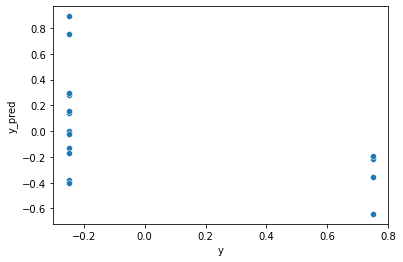

,y_pred
y,
-0.25,0.117266
0.75,-0.351797


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


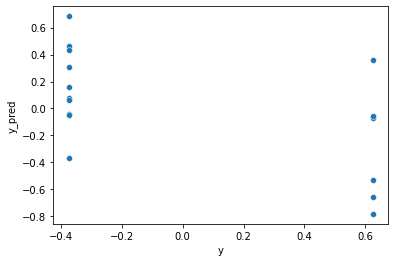

,y_pred
y,
-0.375,0.173456
0.625,-0.289093


Pearson's R^2 within subject and run:
0.03375411274440971
Pearson's R^2 within subject only:
0.028465879401870477
Pearson's R^2 across subjects:
0.026594223576604105


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


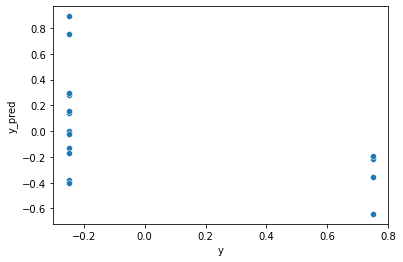

,y_pred
y,
-0.25,0.117266
0.75,-0.351797


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


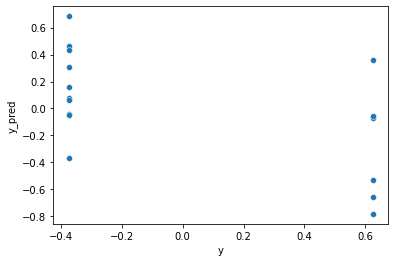

,y_pred
y,
-0.375,0.173456
0.625,-0.289093


Spearman's rho within subject and run:
0.18372292384024838
Spearman's rho within subject only:
0.1687183434066091
Spearman's rho across subjects:
0.16235095992885756


In [16]:
load_pickle_and_print_standard_loocv_results(data_path + "train_test_results_ns_w_hrf_from_spm_40subs_pfc_bintransform.pkl")

## ns_w_hrf_from_spm_before_fingerpress_40subs

In [25]:
load_pickle_and_print_standard_loocv_results(data_path + "train_test_results_ns_w_hrf_from_spm_before_fingerpress_40subs_bintransform.pkl")

Pearson's R^2 within subject and run:
0.20005248162282688
Pearson's R^2 within subject only:
0.19171910202499487
Pearson's R^2 across subjects:
0.18478726495750536
Spearman's rho within subject and run:
0.44727226788928787
Spearman's rho within subject only:
0.43785739918950195
Spearman's rho across subjects:
0.43261930733273246


#### PFC only

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


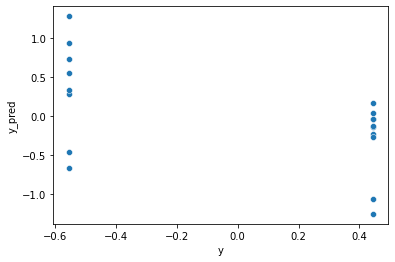

,y_pred
y,
-0.555556,0.371670
0.444444,-0.297336


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


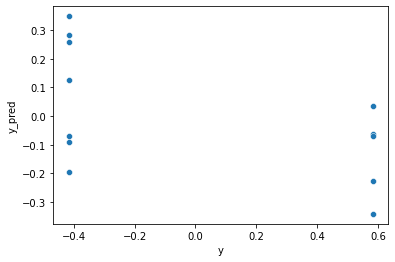

,y_pred
y,
-0.416667,0.094772
0.583333,-0.132680


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


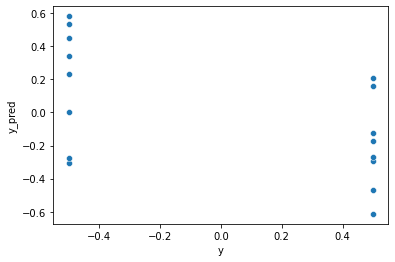

,y_pred
y,
-0.5,0.195869
0.5,-0.195869


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


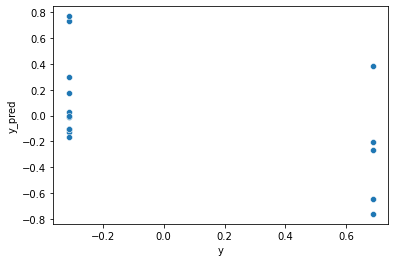

,y_pred
y,
-0.3125,0.135585
0.6875,-0.298286


Pearson's R^2 within subject and run:
0.017440181343528573
Pearson's R^2 within subject only:
0.01433557787488655
Pearson's R^2 across subjects:
0.01576299469464785


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


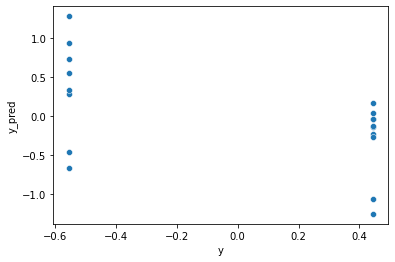

,y_pred
y,
-0.555556,0.371670
0.444444,-0.297336


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


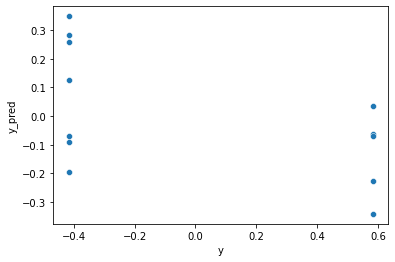

,y_pred
y,
-0.416667,0.094772
0.583333,-0.132680


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


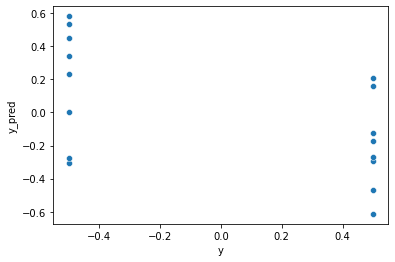

,y_pred
y,
-0.5,0.195869
0.5,-0.195869


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


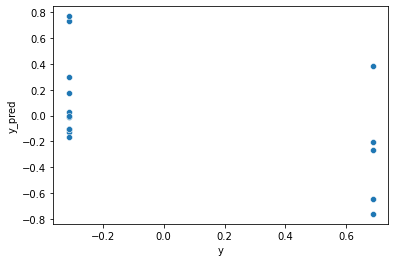

,y_pred
y,
-0.3125,0.135585
0.6875,-0.298286


Spearman's rho within subject and run:
0.13206127874410642
Spearman's rho within subject only:
0.11973127358750742
Spearman's rho across subjects:
0.12914675787784274


In [13]:
load_pickle_and_print_standard_loocv_results(data_path + "train_test_results_ns_w_hrf_from_spm_before_fingerpress_40subs_pfc_bintransform.pkl")

## ns_2s_split_*_40subs

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


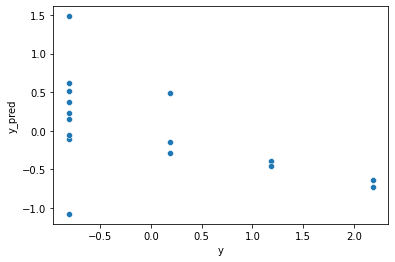

,y_pred
y,
-0.8125,0.238212
0.1875,0.020276
1.1875,-0.423308
2.1875,-0.679061


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


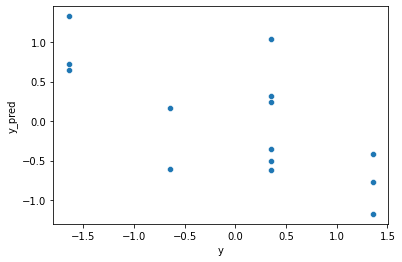

,y_pred
y,
-1.642857,0.899667
-0.642857,-0.224108
0.357143,0.018454
1.357143,-0.787171


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


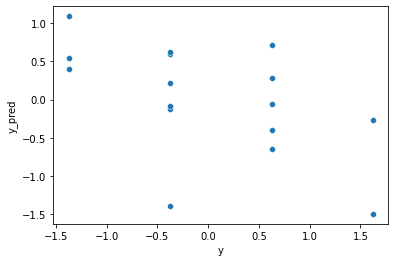

,y_pred
y,
-1.375,0.677456
-0.375,-0.026542
0.625,-0.021202
1.625,-0.883556


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


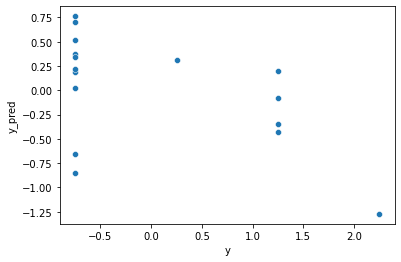

,y_pred
y,
-0.75,0.162018
0.25,0.308981
1.25,-0.164169
2.25,-1.272482


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


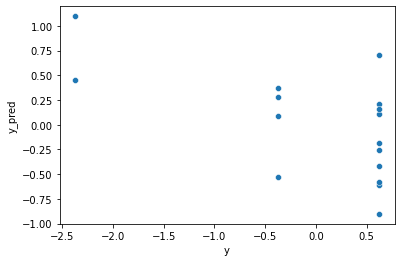

,y_pred
y,
-2.375,0.777107
-0.375,0.051955
0.625,-0.176203


Pearson's R^2 within subject and run:
0.0015236721319045932
Pearson's R^2 within subject only:
0.0011288811686392237
Pearson's R^2 across subjects:
0.0006871510163054083


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


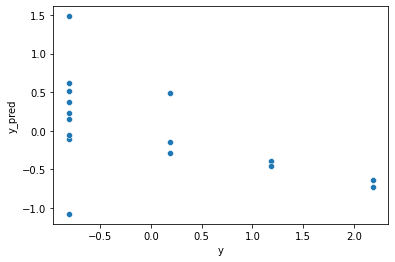

,y_pred
y,
-0.8125,0.238212
0.1875,0.020276
1.1875,-0.423308
2.1875,-0.679061


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


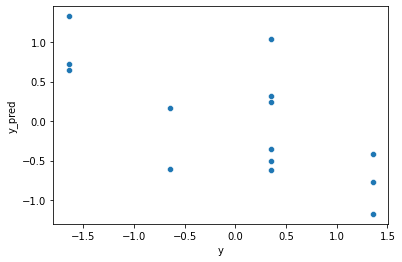

,y_pred
y,
-1.642857,0.899667
-0.642857,-0.224108
0.357143,0.018454
1.357143,-0.787171


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


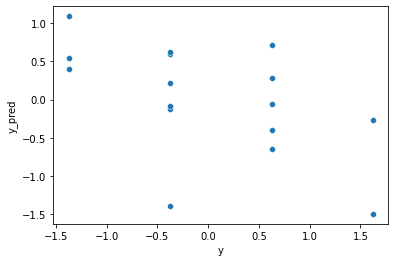

,y_pred
y,
-1.375,0.677456
-0.375,-0.026542
0.625,-0.021202
1.625,-0.883556


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


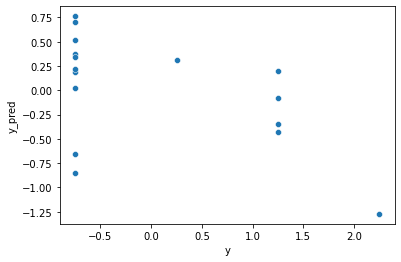

,y_pred
y,
-0.75,0.162018
0.25,0.308981
1.25,-0.164169
2.25,-1.272482


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


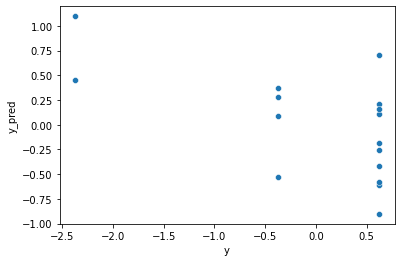

,y_pred
y,
-2.375,0.777107
-0.375,0.051955
0.625,-0.176203


Spearman's rho within subject and run:
0.039034243068165074
Spearman's rho within subject only:
0.03359882689379532
Spearman's rho across subjects:
0.034733471357189336


In [17]:
load_pickle_and_print_standard_loocv_results(data_path + "train_test_results_ns_2s_split_0_40subs.pkl")

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


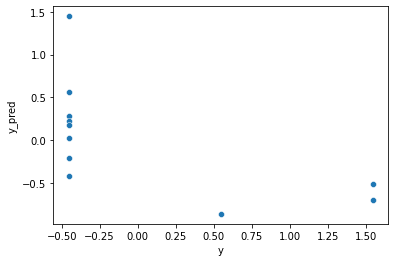

,y_pred
y,
-0.454545,0.260062
0.545455,-0.866231
1.545455,-0.607135


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


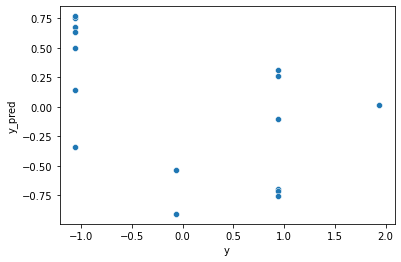

,y_pred
y,
-1.0625,0.446328
-0.0625,-0.721532
0.9375,-0.283022
1.9375,0.016899


Pearson's R^2 within subject and run:
0.0032775026968980187
Pearson's R^2 within subject only:
0.004250309334337535
Pearson's R^2 across subjects:
0.0036006249725942844


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


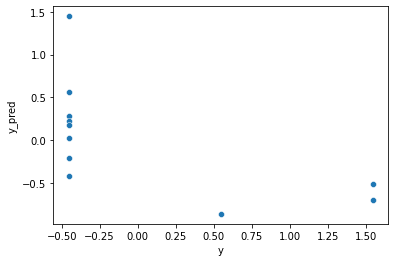

,y_pred
y,
-0.454545,0.260062
0.545455,-0.866231
1.545455,-0.607135


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


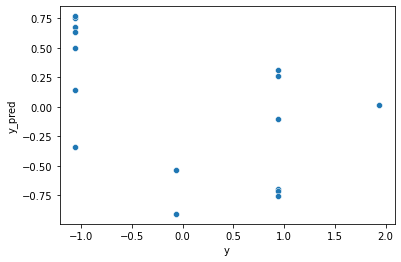

,y_pred
y,
-1.0625,0.446328
-0.0625,-0.721532
0.9375,-0.283022
1.9375,0.016899


Spearman's rho within subject and run:
0.05724947769978359
Spearman's rho within subject only:
0.06519439649492535
Spearman's rho across subjects:
0.06334057103506147


In [18]:
load_pickle_and_print_standard_loocv_results(data_path + "train_test_results_ns_2s_split_2_40subs.pkl")

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


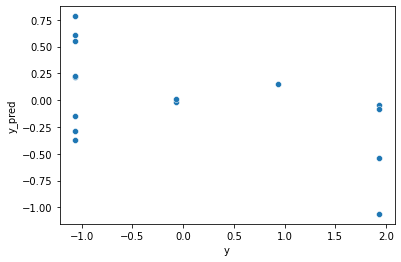

,y_pred
y,
-1.066667,0.196826
-0.066667,-0.000570
0.933333,0.155172
1.933333,-0.432159


Pearson's R^2 within subject and run:
0.047083100956367925
Pearson's R^2 within subject only:
0.04917184087123544
Pearson's R^2 across subjects:
0.04518776118862989


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


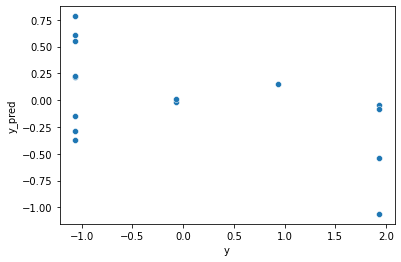

,y_pred
y,
-1.066667,0.196826
-0.066667,-0.000570
0.933333,0.155172
1.933333,-0.432159


Spearman's rho within subject and run:
0.2169864073078494
Spearman's rho within subject only:
0.2217472454648207
Spearman's rho across subjects:
0.20238953083730976


In [19]:
load_pickle_and_print_standard_loocv_results(data_path + "train_test_results_ns_2s_split_4_40subs.pkl")

In [21]:
load_pickle_and_print_standard_loocv_results(data_path + "train_test_results_ns_2s_split_6_40subs.pkl")

Pearson's R^2 within subject and run:
0.10000335019986945
Pearson's R^2 within subject only:
0.09347535578752861
Pearson's R^2 across subjects:
0.07724090040076491
Spearman's rho within subject and run:
0.3162330631035747
Spearman's rho within subject only:
0.30573739677626716
Spearman's rho across subjects:
0.3021925873980788


In [22]:
load_pickle_and_print_standard_loocv_results(data_path + "train_test_results_ns_2s_split_8_40subs.pkl")

Pearson's R^2 within subject and run:
0.17996332571827264
Pearson's R^2 within subject only:
0.16765421940948289
Pearson's R^2 across subjects:
0.1520602443873762
Spearman's rho within subject and run:
0.4242208454546672
Spearman's rho within subject only:
0.40945600424158257
Spearman's rho across subjects:
0.395609842030635


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


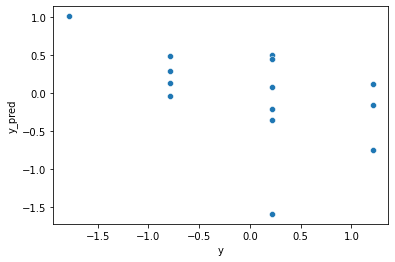

,y_pred
y,
-1.785714,1.013842
-0.785714,0.220712
0.214286,-0.186498
1.214286,-0.259235


Pearson's R^2 within subject and run:
0.047693157058342525
Pearson's R^2 within subject only:
0.04764562675670651
Pearson's R^2 across subjects:
0.04174810420026515


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


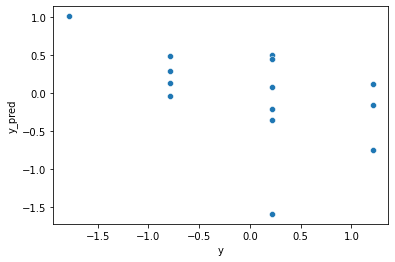

,y_pred
y,
-1.785714,1.013842
-0.785714,0.220712
0.214286,-0.186498
1.214286,-0.259235


Spearman's rho within subject and run:
0.21838763027777586
Spearman's rho within subject only:
0.21827878219539917
Spearman's rho across subjects:
0.20518643083999952


In [23]:
load_pickle_and_print_standard_loocv_results(data_path + "train_test_results_ns_2s_split_10_40subs.pkl")

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


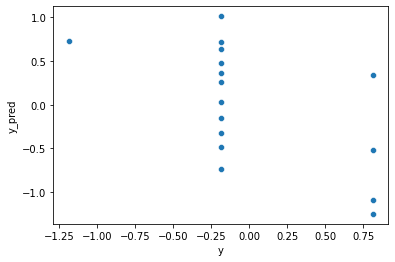

,y_pred
y,
-1.1875,0.725865
-0.1875,0.162791
0.8125,-0.629142


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


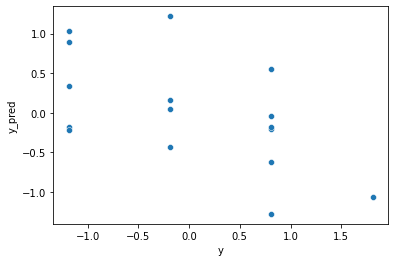

,y_pred
y,
-1.1875,0.369309
-0.1875,0.249236
0.8125,-0.296542
1.8125,-1.064239


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


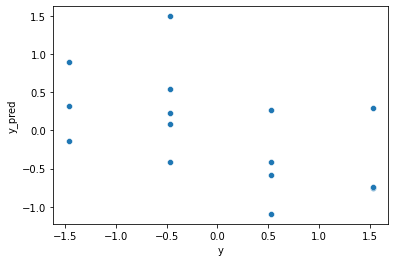

,y_pred
y,
-1.466667,0.360445
-0.466667,0.388944
0.533333,-0.456552
1.533333,-0.399948


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


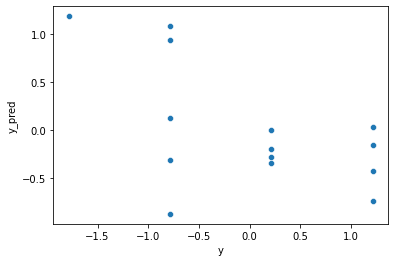

,y_pred
y,
-1.785714,1.181976
-0.785714,0.188605
0.214286,-0.208981
1.214286,-0.322270


Pearson's R^2 within subject and run:
0.002093573724680856
Pearson's R^2 within subject only:
0.001953907975400417
Pearson's R^2 across subjects:
0.0010958250014552668


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


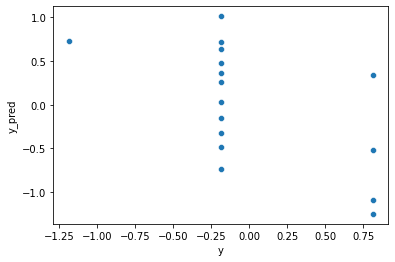

,y_pred
y,
-1.1875,0.725865
-0.1875,0.162791
0.8125,-0.629142


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


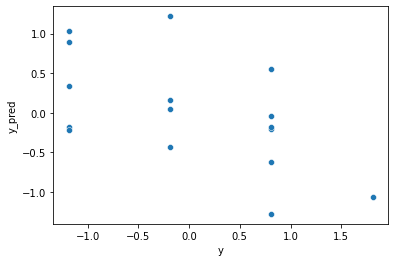

,y_pred
y,
-1.1875,0.369309
-0.1875,0.249236
0.8125,-0.296542
1.8125,-1.064239


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


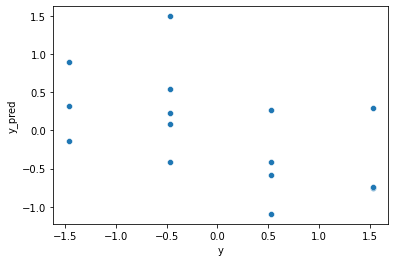

,y_pred
y,
-1.466667,0.360445
-0.466667,0.388944
0.533333,-0.456552
1.533333,-0.399948


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


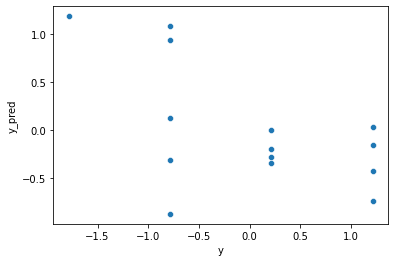

,y_pred
y,
-1.785714,1.181976
-0.785714,0.188605
0.214286,-0.208981
1.214286,-0.322270


Spearman's rho within subject and run:
0.04575558681386194
Spearman's rho within subject only:
0.044203031291987396
Spearman's rho across subjects:
0.036514123688870574


In [24]:
load_pickle_and_print_standard_loocv_results(data_path + "train_test_results_ns_2s_split_12_40subs.pkl")

## 4s with HRF

In [23]:
load_pickle_and_print_standard_loocv_results(data_path + "train_test_results_ns_4s_w_hrf_from_spm_40subs_bintransform.pkl")

Pearson's R^2 within subject and run:
0.2113686891685312
Pearson's R^2 within subject only:
0.19950353401160395
Pearson's R^2 across subjects:
0.19714694158709847
Spearman's rho within subject and run:
0.45974850643425824
Spearman's rho within subject only:
0.4466581847583272
Spearman's rho across subjects:
0.44989934969064577


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


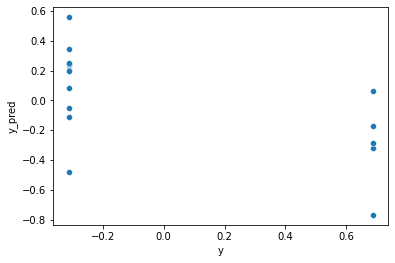

,y_pred
y,
-0.3125,0.134931
0.6875,-0.296849


Pearson's R^2 within subject and run:
0.03385872326283933
Pearson's R^2 within subject only:
0.027634922971052526
Pearson's R^2 across subjects:
0.026324775619888056


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


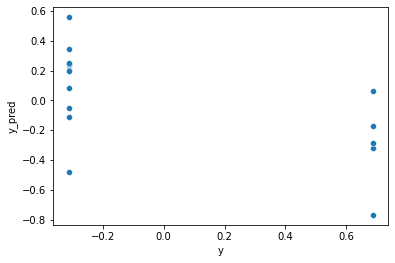

,y_pred
y,
-0.3125,0.134931
0.6875,-0.296849


Spearman's rho within subject and run:
0.18400740002195382
Spearman's rho within subject only:
0.16623754982269356
Spearman's rho across subjects:
0.16345314756676282


In [24]:
load_pickle_and_print_standard_loocv_results(data_path + "train_test_results_ns_4s_w_hrf_from_spm_40subs_mask_pfc_bintransform.pkl")